Vamos estudar o movimento de uma partícula carregada sob efeito de campos magnético e elétrico constantes. Utilizaremos gráficos em 2D e 3D.

### Item (a)

Considere uma partícula de massa $m$ e carga $q$ sob efeito de um campo magnético e elétrico. A partícula possui velocidade $\vec{v}$, e a força exercida sobre ela é dada por

$$\vec{F} = q \vec{v} \times \vec{B} + q\vec{E}$$

- Escreva uma função chamada `forca` com os parâmetros $q$, $\vec v$, $\vec B$ e $\vec E$. Assuma que os vetores são apenas arrays comuns do NumPy. O retorno deve ser exatamente o valor obtido pela equação acima. Utilize o operador correto para efetuar o produto vetorial necessário.

- Obtenha o valor da força para $q = 1$, $\vec v = (5,10,2)$, $\vec B = (1,2,3)$ e $\vec E = (0.5,1,0)$ e confira com o resultado de referência.

Não se esqueça de converter possíveis listas para array!



In [ ]:
import numpy as np
def forca(q,v,B,E):
  return  q*np.cross(v,B) + q*E

v = [5,10,2]
B = [1,2,3]
E = [0.5,1,0]
q=1
print(forca(q,v,B,E)) 

[ 26.5 -12.    0. ]


### Item (b)

Desconsiderando o efeito da gravidade (força peso), escreva uma função `derivada()` a ser utilizada pelo `solve_ivp` do SciPy. Ela deve depender de:

- `t`: tempo
- `var`: array contendo 6 elementos: $x$,$y$,$z$, e as velocidades $v_x$, $v_y$, $v_z$
- `m`: argumento extra, correspondente à massa do objeto
- `q`: argumento extra, correspondente à carga do objeto
- `B`: argumento extra, correspondente ao campo magnético
- `E`: argumento extra, correspondente ao campo elétrico

Dentro dela, chame a função força anteriormente definida.
Note que você pode definir o vetor posição como `r = np.array(var[0:3])`, e o velocidade como `v = np.array(var[3:])`.

> Importante: o retorno da função deve ser 1D, com 6 elementos.

- Teste o resultado da função executando o código abaixo e confira com o resultado de referência:

```python
t = np.linspace(0,10,10)
r0 = [5,1,1]
v0 = [-1,2,-5]
inicial = np.array(r0 + v0)
m=1
q=1
B = np.array([2,1,1])
E = np.array([2,3,1])
derivada(t,inicial,m,q,B,E)
```

In [ ]:
t0, tmax = 0,10
t = np.linspace(t0,tmax,10)
r0 = [5,1,1]
v0 = [-1,2,-5]
inicial = np.array(r0 + v0)
B= np.array([2,1,1])
E = np.array([2,3,1])
m=1
q=1

#definindo os valores para integração
def  derivada(t, var, *args):
  r = np.array(var[:3])
  v = np.array(var[3:])
  return np.array([v, forca(q,v,B,E)], dtype= float).flatten()


derivada(t,inicial,m,q,B,E)

array([-1.,  2., -5.,  9., -6., -4.])

### Item (c)

Utilizando o `solve_ivp`, plote em um gráfico de pontos as posições $y$ versus $x$ da partícula para os seguintes valores:

- $\vec{r}_0 = (5,0,0)$
- $\vec{v}_0 = (0,2,0)$
- $m = 1.5$
- $q = 1$
- $\vec B = (0,0,0.5)$
- $\vec E = (0,0,0)$

Integre o problema para tempos entre 0 e 16 com pelo menos 100 pontos.

Compare o resultado com a previsão de um raio igual a $R = \frac{mv}{|q|B}$.

O gráfico deve ser formatado com os nomes apropriados nos eixos e com o que achar necessário para melhorar a visualização.

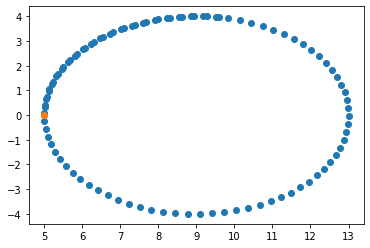

In [ ]:
import scipy.integrate as spint
import matplotlib.pyplot as plt
t0, tmax = 0,16
t = np.linspace(t0,tmax,100)
r0 = [5,0,0]
v0 = [0,2,0]
B= np.array([0,0,0.5])
E = np.array([0,0,0])
m=1.5
q=1

inicial = np.array(r0 + v0)

resultado = spint.solve_ivp(derivada, [t.min(),t.max()], t_eval = t, args=(m,q,B,E), y0 = inicial)
x = resultado.y[0]
y = resultado.y[1]
plt.scatter(x,y)
plt.scatter(r0[0], r0[1])

#print((m*2)/(q*0.5)) 

### Item (d)

Repita o exercício anterior, agora utilizando um Axes3D para o seguinte caso:

- $\vec{r}_0 = (5,0,0)$
- $\vec{v}_0 = (0,2,0)$
- $m = 1.5$
- $q = 1$
- $\vec B = (0,0,0.5)$
- $\vec E = (0.1,-0.5,2)$

*Dica: importe o `Axes3D` com `from mpl_toolkits.mplot3d.axes3d import Axes3D`*

Text(0.5, 0, 'z')

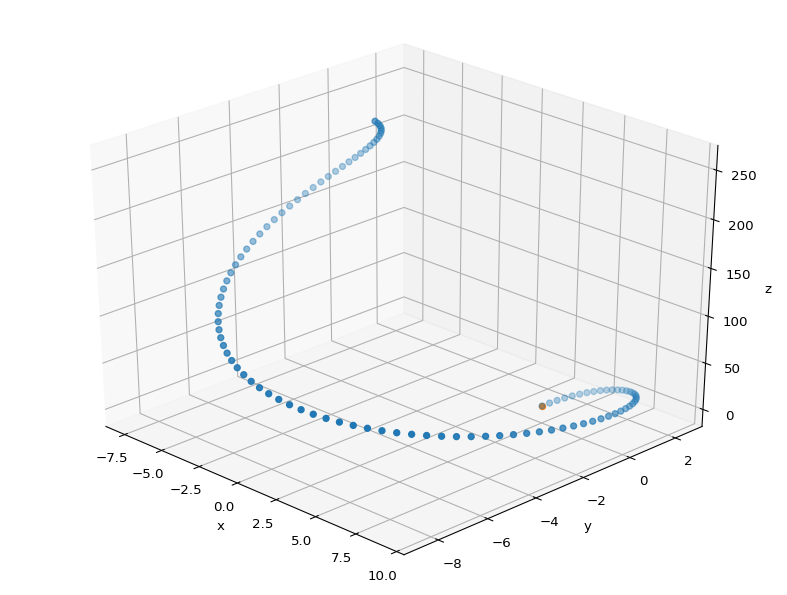

In [ ]:
t0, tmax = 0,16
t = np.linspace(t0,tmax,100)
r0 = [5,0,0]
v0 = [0,2,0]
B= np.array([0,0,0.5])
E = np.array([0.1,-0.5,2])
m=1.5
q=1
inicial = np.array(r0 + v0)

resultado = spint.solve_ivp(derivada, [t.min(),t.max()], t_eval = t, args=(m,q,B,E), y0 = inicial)
x = resultado.y[0]
y = resultado.y[1]
z = resultado.y[2]

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize = (8,6), dpi = 96)
ax = Axes3D(fig, azim =-45, elev=30)
ax.scatter(x,y,z,label = 'Trajetória')
ax.scatter(r0[0],r0[1],r0[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')